# CREDIT CARD FRAUD DETECTION

### Importing Libraries

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.decomposition import PCA
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

### Getting data and see what is in it

In [2]:
data=pd.read_csv(r'/media/sougata/primary/code/python_machine_learning/creditCardFraud/creditcard.csv' )
data.tail()
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### View the correlation matrix

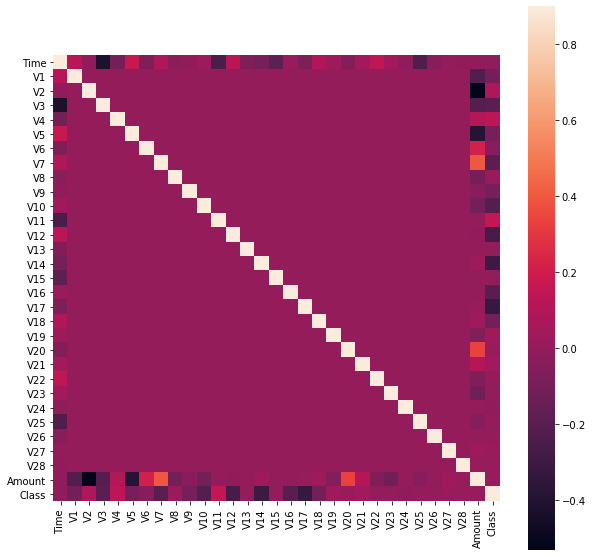

In [43]:
corrmat=data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corrmat,vmax=.9,square=True)
plt.show()

### Dividing dataset into x and y

In [8]:
x=data.drop('Class', axis=1)
y=data.Class

fraud=data[data.Class==1.00]
valid=data[data.Class==0.0]
print(len(fraud))
print(len(valid))
print(fraud.iloc[:,:-1].shape)
print(fraud.iloc[:,-1].shape)

### Applying stander scaler to the dataset

In [10]:
x.Amount=StandardScaler().fit_transform(x.Amount.values.reshape(-1,1))
x.Time=StandardScaler().fit_transform(x.Time.values.reshape(-1,1))

x_data_pca=x.iloc[:,1:-1]
x_data=x[['Time','Amount']]
pca=PCA(n_components=2)
pca_data=pca.fit_transform(x)
dataframe=pd.DataFrame(pca_data,columns=['pca 1','pca 2'])

### Dividing into training and testing set

In [11]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


### Applying resample method to increase no of fraud data

In [23]:
X= pd.concat([x_train, y_train], axis=1)
FRAUD=X[X.Class==1]
NOT_FRAUD=X[X.Class==0]
fraud_up_sampled=resample(FRAUD,replace=True,n_samples=len(NOT_FRAUD),random_state=0)
upsampled=pd.concat([fraud_up_sampled,NOT_FRAUD])
upsampled.Class.value_counts()

1    227454
0    227454
Name: Class, dtype: int64

### Applying random forest and getting accuracy

In [26]:
X_TRAIN=upsampled.drop(['Class'],axis=1)
Y_TRAIN=upsampled.Class
clf=RandomForestClassifier(n_estimators=100,n_jobs=-1)
clf.fit(X_TRAIN,Y_TRAIN)
#accuracy_score(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [28]:
accuracy_score(Y_TRAIN,clf.predict(X_TRAIN))

1.0

In [29]:
accuracy_score(y_test,clf.predict(x_test))

0.9995435553526912

plt.scatter(X_train[:,0],x_train[:,1])
plt.plot(x_train,clf.predict(x_train),c='r')
plt.show()

In [ ]:
y_pred=clf.predict(x_test).tolist()
type(y_pred)

### Visualizing confusion matrix

In [35]:
confusion_matri1x=confusion_matrix(y_test,y_pred)
confusion_matri1x

array([[56854,     7],
       [   19,    82]])